In [1]:
%pylab inline
import numpy as np
import pandas as pd
import os
import sys
sys.path.insert(0, '/home/jfm343/Documents/Delafossites/integration_delafossite/Modular')
# sys.path.insert(0, '/Users/juanmendezvalderrama/Documents/Proyectos/Delafossites/integration_delafossite/Modular')
# sys.path.insert(0, '/home/juan/Documents/Projects//Delafossites/integration_delafossite/Modular')
import Dispersion
import Lattice
from scipy import linalg as la
import seaborn as sns
from scipy.optimize import curve_fit

import matplotlib
font = {'size'   : 24}

matplotlib.rc('font', **font)

Populating the interactive namespace from numpy and matplotlib


In [2]:
pathMAC="/Users/juanmendezvalderrama/Documents/Proyectos/Delafossites/integration_delafossite"
pathchow='/home/jfm343/Documents/Delafossites/integration_delafossite'
pathpc='/home/juan/Documents/Projects//Delafossites/integration_delafossite'
# pathy=pathMAC
pathy=pathchow
# pathy=pathpc

In [3]:
path=pathy+'/data/nu_w_sweep_2022-05-25-05-38-10'
# path=pathy+'/data/tempsweep_radial_mac__2022-05-01-22-48-29'
subpaths=os.listdir(path)
subpaths=list(filter(lambda a: a != 'inforun', subpaths))
def getdatadir(fulpath):
    data=[]
    for pa in fulpath:
        if ('data' in pa): data.append(pa)
    return data
frames=[]
for i, pat in enumerate(subpaths):
    # print(pat)
    fulpath=path+'/'+pat
    subpaths2=os.listdir(fulpath)
    data= getdatadir(subpaths2)
    print(data)
    fullpath=fulpath+'/'+data[0]
    print("reading data ",fullpath)
    
    dff = pd.read_hdf(fullpath)
    frames.append(dff)
    
df=pd.concat(frames).sort_values(['theta', 'nu'])


['data2022-05-25-02-56-36.h5']
reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/nu_w_sweep_2022-05-25-05-38-10/nu_w_sweep_0.1/data2022-05-25-02-56-36.h5
['data2022-05-25-05-38-09.h5']
reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/nu_w_sweep_2022-05-25-05-38-10/nu_w_sweep_0.5/data2022-05-25-05-38-09.h5
['data2022-05-25-03-56-28.h5']
reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/nu_w_sweep_2022-05-25-05-38-10/nu_w_sweep_0.2/data2022-05-25-03-56-28.h5
['data2022-05-25-04-48-41.h5']
reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/nu_w_sweep_2022-05-25-05-38-10/nu_w_sweep_0.3/data2022-05-25-04-48-41.h5
['data2022-05-25-01-47-24.h5']
reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/nu_w_sweep_2022-05-25-05-38-10/nu_w_sweep_0.05/data2022-05-25-01-47-24.h5


In [4]:
# # #electronic parameters
J=2*5.17 #in mev
tp1=568/J #in units of Js\
tp2=-tp1*108/568 #/tpp1
##coupling 
U=4000/J
g=100/J
Kcou=g*g/U
# fill=0.67 #van hove
fill=0.5

Machine='CH1'

##########################
##########################
# Geometry/Lattice
##########################
##########################
Npoints=1000
Npoints_int_pre, NpointsFS_pre=2000,600
save=True
l=Lattice.TriangLattice(Npoints_int_pre, save,Machine)
Vol_rec=l.Vol_BZ()
l2=Lattice.SQLattice(Npoints, save, Machine)
Vol_rec2=l2.Vol_BZ()



# ##########################
# ##########################
# # Fermi surface and structure factor
# ##########################
# ##########################
ed=Dispersion.Dispersion_TB_single_band([tp1,tp2],fill,Machine)

# ed=Dispersion.Dispersion_circ([tp1,tp2],fill)
[KxFS,KyFS]=ed.FS_contour(NpointsFS_pre)


indmin=np.argmin((ed.earr-(ed.mu))**2)
indmax=np.argmin((ed.earr-(ed.mu+20))**2)
print(indmin, indmax)


print(np.max(ed.earr), np.min(ed.earr), ed.mu, np.size(ed.earr))

nu=ed.earr[indmin:indmax]-ed.mu
ome=np.linspace(-2*np.pi, 2*np.pi, 2000)
dome=ome[1]-ome[0]
rhonu=ed.Dos[indmin:indmax]

from scipy import stats
slope, intercept, r, p, se = stats.linregress(ed.earr[indmin:indmax], rhonu)


from scipy.special import spence as dilog2
def analytical_form(omega,T, alpha):
    Jpre=10.34
    
    z=alpha*Jpre/T
    x=omega/T
    
    exp_sum=np.exp(-(z+x))
    exp_dif=np.exp(-(-z+x))
    exp_zero=np.exp(z)
    dilog_1=dilog2(1-(-exp_sum))
    dilog_2=dilog2(1-(-exp_dif))
    dilog_3=dilog2(1-(1-exp_zero))
    
    dilogterms=(-dilog_2+dilog_1-2*dilog_3)/z
    logterm=np.log((exp_sum+1)*(exp_dif+1))
    
    
    
    return alpha*(dilogterms-logterm-z/2)



Machine arg is, CH1
Machine arg is, CH1
started calculating filling for chemical potential and dispersion parameters TB_single_band..
Machine arg is, CH1
reading lattice from... ./Lattices/KgridX1200.npy
reading lattice from... ./Lattices/KgridY1200.npy
Machine arg is, CH1
reading lattice from... ./Lattices/KgridX1200.npy
reading lattice from... ./Lattices/KgridY1200.npy
norm of Dos, 42.97093206665365 45.58575006211245
sum of the hist, normed? 42.97093206665365
finished calculating filling for chemical potential
Filling: 0.49313107609556217 .... chemical potential: 23.93702777725383
Machine arg is, CH1
reading lattice from... ./Lattices/KgridX1200.npy
reading lattice from... ./Lattices/KgridY1200.npy
sum of the hist, normed? 0.9999999999999923
starting contour.....
finished contour..... 3.0557916164398193
2352 2513
227.9605415860735 -267.41895551257255 23.93702777725383 4000


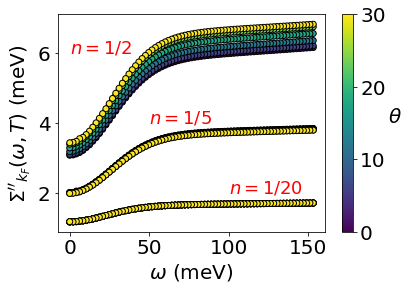

In [5]:
# thets=df['theta'].unique()
# tss=df['T'].unique()

# for th in thets:
#     df2=df.loc[(df['theta'] ==th )&(df['T'] <= 10)]
#     ax2 = df2.plot( x='freq',y='SE', c='T',colormap='viridis', sharex=True, kind='scatter')
#     plt.title('theta='+str(th*180/np.pi))
    
# print(tss)

thets=df['nu'].unique()
tss=df['T'].unique()

df2=df.loc[(df['nu'] ==0.05 )]
th=np.pi+np.array(df2['theta']) -np.pi/6
fr=np.array(df2['freq'])
se=np.array(df2['SE'])
plt.scatter(fr[::-1], se[::-1], c=th,marker='o', edgecolor='k' )


df2=df.loc[(df['nu'] ==0.2 )]
th=np.pi+np.array(df2['theta'])-np.pi/6
fr=np.array(df2['freq'])
se=np.array(df2['SE'])
plt.scatter(fr[::-1], se[::-1], c=th,marker='o', edgecolor='k' )


df2=df.loc[(df['nu'] ==0.5 )]
th=(np.pi+np.array(df2['theta'])-np.pi/6)*180/np.pi
fr=np.array(df2['freq'])
se=np.array(df2['SE'])
im=plt.scatter(fr[::-1], se[::-1], c=th,marker='o', edgecolor='k' )


pyplot.locator_params(axis='y', nbins=4)
pyplot.locator_params(axis='x', nbins=4)

plt.ylabel(r"$\Sigma''_{k_F}(\omega, T)$ (meV)", size=20) 
plt.xticks(size=20)
plt.yticks(size=20)
plt.xlabel(r"$\omega$ (meV)", size=20)

cbar = plt.colorbar(im)
tick_font_size = 20
cbar.ax.tick_params(labelsize=tick_font_size)

plt.text(0,6,r'$n=1/2$', size=18, c='r')
plt.text(50,4,r'$n=1/5$', size=18,  c='r')
plt.text(100,2,r'$n=1/20$', size=18,  c='r')
plt.text(200,4,r'$\theta$', size=20,  c='k')
plt.savefig("./imgs/pap_figapp3.png", dpi=400, bbox_inches='tight')
plt.show()

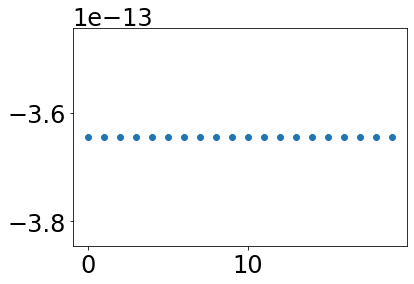

In [6]:
plot(th[:20]*180/np.pi, 'o')

In [7]:
path=pathy+'/data/nu_w_sweep_T10_2022-05-25-19-46-57'
# path=pathy+'/data/tempsweep_radial_mac__2022-05-01-22-48-29'
subpaths=os.listdir(path)
subpaths=list(filter(lambda a: a != 'inforun', subpaths))
def getdatadir(fulpath):
    data=[]
    for pa in fulpath:
        if ('data' in pa): data.append(pa)
    return data
frames=[]
for i, pat in enumerate(subpaths):
    # print(pat)
    fulpath=path+'/'+pat
    subpaths2=os.listdir(fulpath)
    data= getdatadir(subpaths2)
    print(data)
    fullpath=fulpath+'/'+data[0]
    print("reading data ",fullpath)
    
    dff = pd.read_hdf(fullpath)
    frames.append(dff)
    
df3=pd.concat(frames).sort_values(['theta', 'nu'])

['data2022-05-25-19-46-55.h5']
reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/nu_w_sweep_T10_2022-05-25-19-46-57/nu_w_sweep_T10_0.5/data2022-05-25-19-46-55.h5
['data2022-05-25-18-33-46.h5']
reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/nu_w_sweep_T10_2022-05-25-19-46-57/nu_w_sweep_T10_0.3/data2022-05-25-18-33-46.h5
['data2022-05-25-16-15-17.h5']
reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/nu_w_sweep_T10_2022-05-25-19-46-57/nu_w_sweep_T10_0.1/data2022-05-25-16-15-17.h5
['data2022-05-25-14-55-17.h5']
reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/nu_w_sweep_T10_2022-05-25-19-46-57/nu_w_sweep_T10_0.05/data2022-05-25-14-55-17.h5
['data2022-05-25-17-29-23.h5']
reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/nu_w_sweep_T10_2022-05-25-19-46-57/nu_w_sweep_T10_0.2/data2022-05-25-17-29-23.h5


3.269281441740437
3.2681093919861066
4.6439083600895845


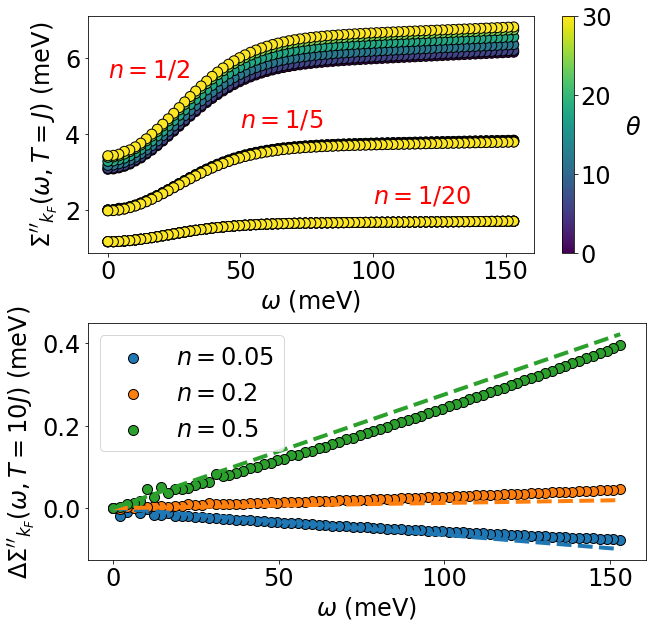

In [8]:
figure = plt.figure(figsize = (10, 10))
gs = figure.add_gridspec(2, hspace=.3)
axis = gs.subplots()
siz=100

thets=df['nu'].unique()
tss=df['T'].unique()

df2=df.loc[(df['nu'] ==0.05 )]
th=np.pi+np.array(df2['theta']) -np.pi/6
fr=np.array(df2['freq'])
se=np.array(df2['SE'])
axis[0].scatter(fr[::-1], se[::-1], c=th,marker='o', edgecolor='k',s=siz )


df2=df.loc[(df['nu'] ==0.2 )]
th=np.pi+np.array(df2['theta'])-np.pi/6
fr=np.array(df2['freq'])
se=np.array(df2['SE'])
axis[0].scatter(fr[::-1], se[::-1], c=th,marker='o', edgecolor='k',s=siz )


df2=df.loc[(df['nu'] ==0.5 )]
th=(np.pi+np.array(df2['theta'])-np.pi/6)*180/np.pi
fr=np.array(df2['freq'])
se=np.array(df2['SE'])
im=axis[0].scatter(fr[::-1], se[::-1], c=th,marker='o', edgecolor='k',s=siz )


pyplot.locator_params(axis='y', nbins=4)
pyplot.locator_params(axis='x', nbins=4)

axis[0].set_ylabel(r"$\Sigma''_{k_F}(\omega, T=J)$ (meV)") 

figure.colorbar(im,ax=axis[0])


axis[0].text(0,5.5,r'$n=1/2$',  c='r')
axis[0].text(50,4.2,r'$n=1/5$',  c='r')
axis[0].text(100,2.2,r'$n=1/20$',   c='r')
axis[0].text(195,4,r'$\theta$',   c='k')

axis[0].set_xlabel(r"$\omega$ (meV)")


vs=np.array([0.0021928077007395495 ,0.0015482010761976664, 0.0016763630556556972])/(10.34)
ms=np.array([1.3449386619169152e-05, 6.203585792597396e-07, -3.4314332176483707e-06])/(10.34*10.34)

df4=df3.loc[(df3['nu'] ==0.05 )&(df3['theta'] ==np.array(df3['theta'])[0])]
th=np.pi+np.array(df2['theta']) -np.pi/6
fr=np.array(df4['freq'])
se=np.array(df4['SE'])
print(se[0])
axis[1].scatter(fr[::-1], se[::-1]-se[0], marker='o', edgecolor='k',s=siz , label=r"$n=0.05$" )
axis[1].plot(fr,fr*ms[2]*se[0]/vs[2], lw=4, ls='--')

df4=df3.loc[(df3['nu'] ==0.2 )&(df3['theta'] ==np.array(df3['theta'])[0])]
th=np.pi+np.array(df2['theta']) -np.pi/6
fr=np.array(df4['freq'])
se=np.array(df4['SE'])
print(se[0])
axis[1].scatter(fr[::-1], se[::-1]-se[0], marker='o', edgecolor='k',s=siz , label=r"$n=0.2$" )
axis[1].plot(fr,fr*ms[1]*se[0]/vs[1], lw=4, ls='--')

df4=df3.loc[(df3['nu'] ==0.5 )&(df3['theta'] ==np.array(df3['theta'])[2000])]
th=np.pi+np.array(df2['theta']) -np.pi/6
fr=np.array(df4['freq'])
se=np.array(df4['SE'])
print(se[0])
axis[1].scatter(fr[::-1], se[::-1]-se[0], marker='o', edgecolor='k' ,s=siz , label=r"$n=0.5$")
axis[1].plot(fr,fr*ms[0]*se[0]/vs[0], lw=4, ls='--')

pyplot.locator_params(axis='y', nbins=4)
pyplot.locator_params(axis='x', nbins=4)

axis[1].set_ylabel(r"$\Delta \Sigma''_{k_F}(\omega, T=10J)$ (meV)") 



axis[1].legend()

axis[1].set_xlabel(r"$\omega$ (meV)")
plt.savefig("./imgs/pap_figapp3.png", dpi=400, bbox_inches='tight')
plt.show()